In [15]:
import numpy as np

In [16]:
import tensorflow as tf

In [5]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b7/f8/32d6b5aa4c4bc045fa2c4c58f88c325facc54721956c6313f0afea8ea853/pandas-2.1.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/502.3 kB ? eta -:--:--
      --------------------------------------- 10.2/502.3 kB ? eta -:--:--
     --- --------------------------------- 41.0/502.3 kB 653.6 kB/s eta 0:00:01
     ------------------------- ------------ 337.9/502.3 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 502.3/502.3 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------------------------------- 341.8/341.8 kB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.0 MB 17.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/11.0 MB 15.4 MB/s eta 0:00:01
   ------ ------------------

In [17]:
import pandas as pd

In [36]:
!pip install scikit-learn

In [37]:
import sklearn as sk

In [5]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [44]:
X = dataset.iloc[:, 0:9].values
##Column 0 is Gender Column, Negative 1 is the ID##
y = dataset.iloc[:, -1].values

In [41]:
X

array([['Female', 80.0, 0, ..., 6.6, 140, 0],
       ['Female', 54.0, 0, ..., 6.6, 80, 0],
       ['Male', 28.0, 0, ..., 5.7, 158, 0],
       ...,
       ['Male', 66.0, 0, ..., 5.7, 155, 0],
       ['Female', 24.0, 0, ..., 4.0, 100, 0],
       ['Female', 57.0, 0, ..., 6.6, 90, 0]], dtype=object)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
##0 Is Female , 1 is Male##

In [43]:
print(X)

[[0 80.0 0 ... 6.6 140 0]
 [0 54.0 0 ... 6.6 80 0]
 [1 28.0 0 ... 5.7 158 0]
 ...
 [1 66.0 0 ... 5.7 155 0]
 [0 24.0 0 ... 4.0 100 0]
 [0 57.0 0 ... 6.6 90 0]]


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
## Hot Encoding Smoke History# 

In [60]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')

In [61]:
X = np.array(ct.fit_transform(X))

In [63]:
print(X)

[[0.0 0.0 0.0 ... 6.6 140 0]
 [1.0 0.0 0.0 ... 6.6 80 0]
 [0.0 0.0 0.0 ... 5.7 158 0]
 ...
 [0.0 0.0 0.0 ... 5.7 155 0]
 [0.0 0.0 0.0 ... 4.0 100 0]
 [0.0 1.0 0.0 ... 6.6 90 0]]


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()

In [68]:
X_train = sc.fit_transform(X_train)

In [69]:
X_test = sc.transform(X_test)

In [70]:
#ANN Building Time *Confettis*#

In [71]:
ann = tf.keras.models.Sequential()

In [86]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [85]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [74]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [75]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [76]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0803 - accuracy: 0.9740
Epoch 2/100
2500/2500 [==============================] - 3s 1ms/step - loss: 3.4590e-04 - accuracy: 1.0000
Epoch 3/100
2500/2500 [==============================] - 3s 1ms/step - loss: 4.8392e-05 - accuracy: 1.0000
Epoch 4/100
2500/2500 [==============================] - 3s 1ms/step - loss: 9.9659e-06 - accuracy: 1.0000
Epoch 5/100
2500/2500 [==============================] - 3s 1ms/step - loss: 2.2965e-06 - accuracy: 1.0000
Epoch 6/100
2500/2500 [==============================] - 3s 1ms/step - loss: 5.5586e-07 - accuracy: 1.0000
Epoch 7/100
2500/2500 [==============================] - 3s 1ms/step - loss: 1.3665e-07 - accuracy: 1.0000
Epoch 8/100
2500/2500 [==============================] - 3s 1ms/step - loss: 3.4829e-08 - accuracy: 1.0000
Epoch 9/100
2500/2500 [==============================] - 3s 1ms/step - loss: 9.3776e-09 - accuracy: 1.0000
Epoch 10/100
2500/2500 [=================

In [77]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 1s 926us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [81]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  153.6/154.1 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 154.1/154.1 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency informatio

In [82]:
import matplotlib.pyplot as plt

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

[[18297     0]
 [    0  1703]]


1.0

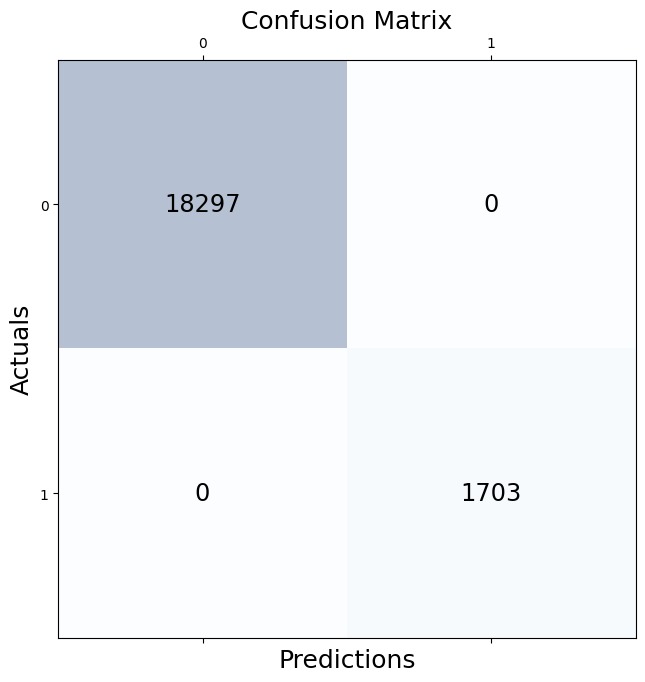

In [84]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()